In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import scipy.stats as stats

In [2]:
def analysis(path):
    figure = 1
    # read data
    df = pd.read_csv(path)
    
    # show sample
    print("smale sample from data")
    print(df.head())
    print('*'*80)
    
    
    # information
    print("show information about data")
    print(df.info())
    print('*'*80)

    
    # check nulls and duplicates
    print("Null values")
    print(df.isnull().sum())
    print("duplicateed value")
    print(df.duplicated().sum())
    print('*'*80)

    
    # split data to categorical, numerical and bool features
    cat = df[["user_id", "item_id", "gender", "age", "item_score1", "item_score2", "item_score3", "category_second", "category_first"]]
    bool_values = df.select_dtypes("bool")
    num = df[["click_count", "like_count", "comment_count", "read_percentage", "read_time"]]
    
    # statistical analysis to numeric features
    print("statistical describtion ")
    print(num.describe(include = "all"))
    
    for n in num.columns:
        title = "Figure" + str(figure) + ": Check normality for " + n + " column:"
        figure +=1
        print(title)
        #seems that the monthly gross rent does not follow normal distribution, let's perform statistical test.
        # Shapiro-wilk test
        w, pvalue = stats.shapiro(df[n]) #p value obtained from the Shapiro-Wilk test is significant (p < 0.05), we conclude that the data is not normally distribute
        print("p = {:g}".format(pvalue))

        # D’Agostino-Pearson’s K² test, ref https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
        k2, p = stats.normaltest(df[n])
        alpha = 1e-3
        print("p = {:g}".format(p))
        p = 8.4713e-19
        if p < alpha:  # null hypothesis: x comes from a normal distribution
            print("The null hypothesis can be rejected")
        else:
            print("The null hypothesis cannot be rejected")
        
        plt.title(title)
        sns.kdeplot(df[n])
        plt.show()
        
        
    corr = num.corr()
    corr_title = "Figure" + str(figure) +": Correlation between numeric features"
    figure +=1
    plt.title(corr_title)
    sns.heatmap(corr, annot=True)
    plt.show()
        
    
    # analysis for categorical features
    for c in cat.columns:
        print("analysis for " + c + " column:")
        # number of values
        print("The number of values this column has: ")
        print(cat[c].nunique())
        # mode
        print("Most frequant value is: " )
        print(df["user_id"].mode()[0])
        # How many times mode appear
        print("This value appeared by: "+ str(df [df[c] == df[c].mode()[0]].shape[0] / df.shape[0] * 100) + "%")
        if c not in ["item_id", "user_id", "category_second"]:
        # plot
            my_title = "Figure" + str(figure) + ": Check frequancy of " + c + " column"
            figure +=1
            plt.title(my_title)
            plt.xticks(rotation=90)
            sns.countplot(x=df[c])
            plt.show()
            print("*"*80)

        else:
            print("plot is not useful for this model")
            print("*"*80)

    # Analysis for bool featires
    for b in bool_values.columns:
        print("count of true or false values for " + b + " column: ")
        print(df[b].value_counts())
        bool_title = "Figure" + str(figure) + ": Check frequancy of " + b + " with gender"
        figure +=1
        plt.title(bool_title)
        sns.countplot(x=df[b], hue= df["gender"])
        plt.show()
        
    # some analysis to get insights
    # How many user like, share, follow and favorite this item
    print("How many time this item was shared, liked and favorite: ")
    print(df.groupby(["item_id"]).agg("sum")[["share", "follow", "like", "favorite"]])
    
    print("How many time this user  shared, follow, liked and favorite items: ")
    print(df.groupby(["user_id"]).agg("sum")[["share", "follow", "like", "favorite"]])

smale sample from data
   user_id  item_id  click  gender  age  click_count  like_count  \
0   393219    73342    1.0       2    2           73           1   
1   393219    17695    1.0       2    2        29552         209   
2   393219    40457    1.0       2    2        20285         242   
3   917512    60594    1.0       1    4          485           1   
4   917512     8575    1.0       1    4         9850          11   

   comment_count  read_percentage  item_score1  item_score2  category_second  \
0              0             25.0            3          3.0            12000   
1             84             43.0            3          3.0            11204   
2             90             43.0            4          7.0            10203   
3              0             45.0            2          3.0            12103   
4             14             42.0            2          3.0            12108   

   category_first  item_score3  read  read_time  share   like  follow  \
0             

/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p = 0
p = 0
The null hypothesis can be rejected


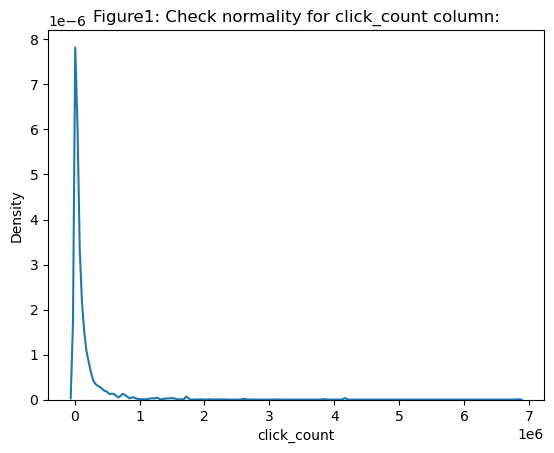

Figure2: Check normality for like_count column:
p = 0
p = 0
The null hypothesis can be rejected


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


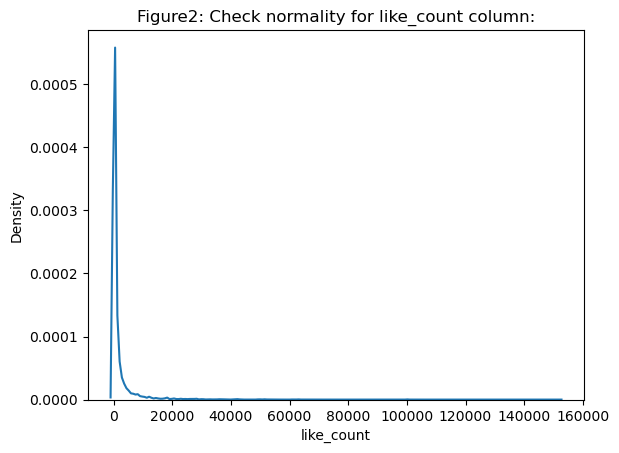

Figure3: Check normality for comment_count column:
p = 0
p = 0
The null hypothesis can be rejected


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


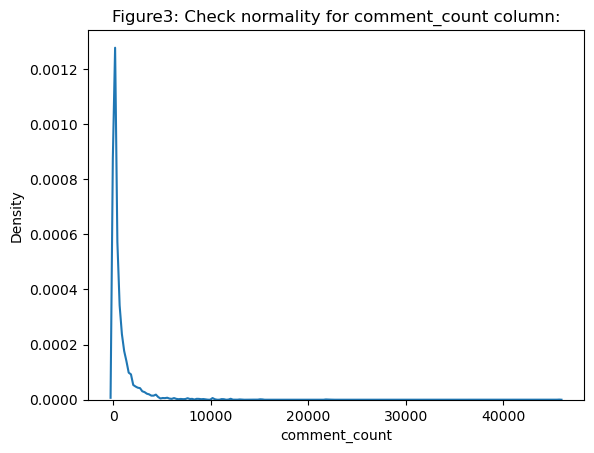

Figure4: Check normality for read_percentage column:
p = 0
p = 0
The null hypothesis can be rejected


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


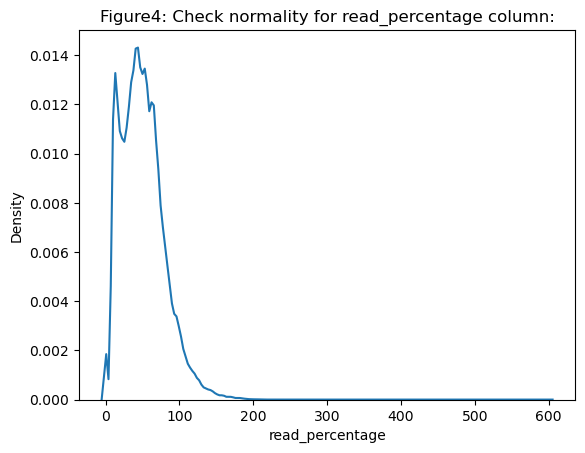

Figure5: Check normality for read_time column:
p = 0
p = 0
The null hypothesis can be rejected


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


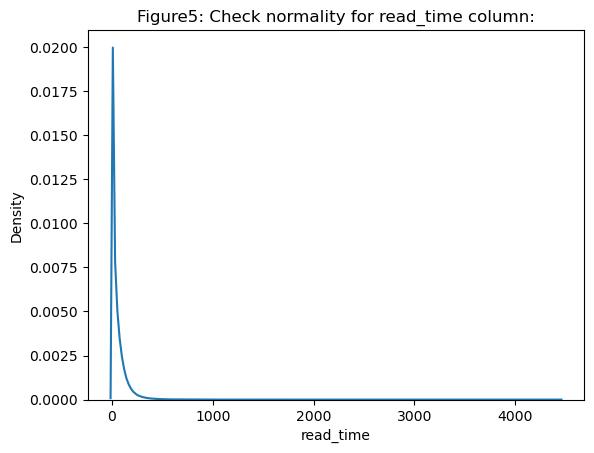

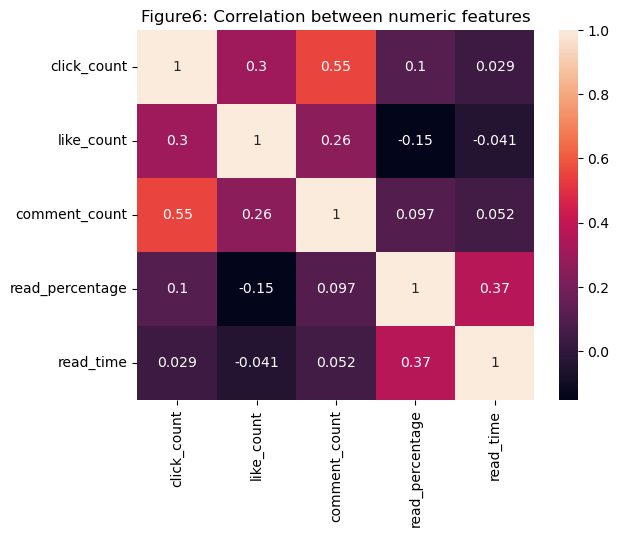

analysis for user_id column:
The number of values this column has: 
68661
Most frequant value is: 
819433
This value appeared by: 0.10690405539070227%
plot is not useful for this model
********************************************************************************
analysis for item_id column:
The number of values this column has: 
95933
Most frequant value is: 
819433
This value appeared by: 0.35853610286844706%
plot is not useful for this model
********************************************************************************
analysis for gender column:
The number of values this column has: 
3
Most frequant value is: 
819433
This value appeared by: 68.28003956478734%


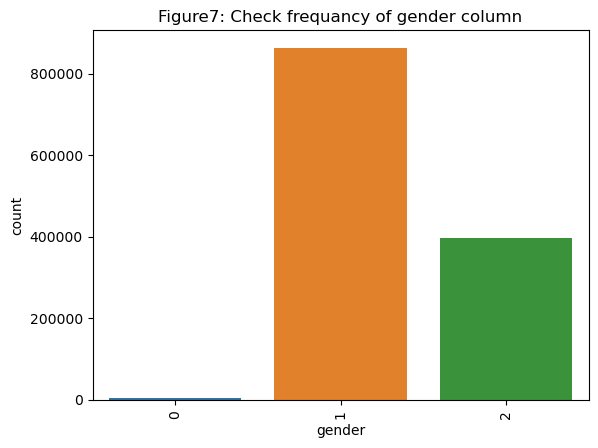

********************************************************************************
analysis for age column:
The number of values this column has: 
8
Most frequant value is: 
819433
This value appeared by: 48.11212660731948%


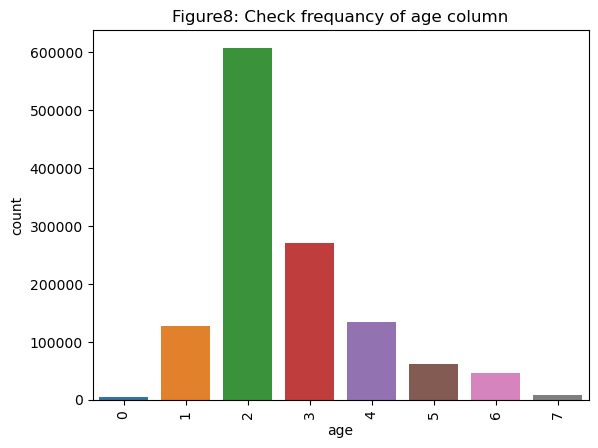

********************************************************************************
analysis for item_score1 column:
The number of values this column has: 
6
Most frequant value is: 
819433
This value appeared by: 48.95169139465875%


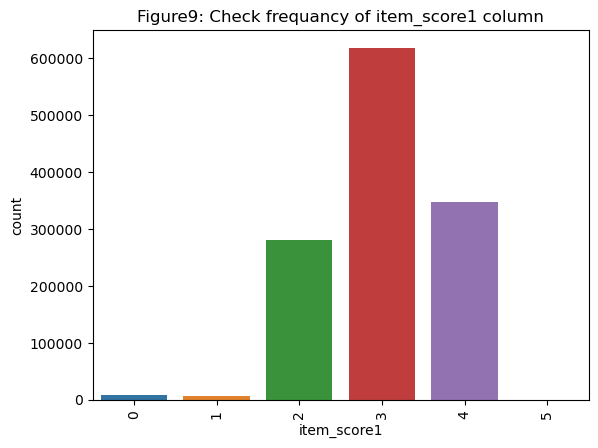

********************************************************************************
analysis for item_score2 column:
The number of values this column has: 
10
Most frequant value is: 
819433
This value appeared by: 96.7757072205737%


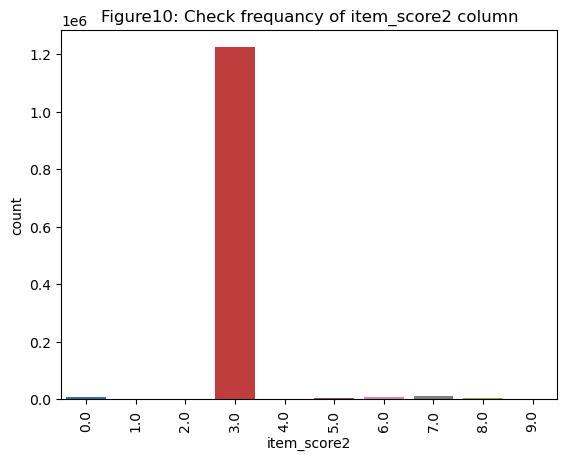

********************************************************************************
analysis for item_score3 column:
The number of values this column has: 
11
Most frequant value is: 
819433
This value appeared by: 19.724312561819982%


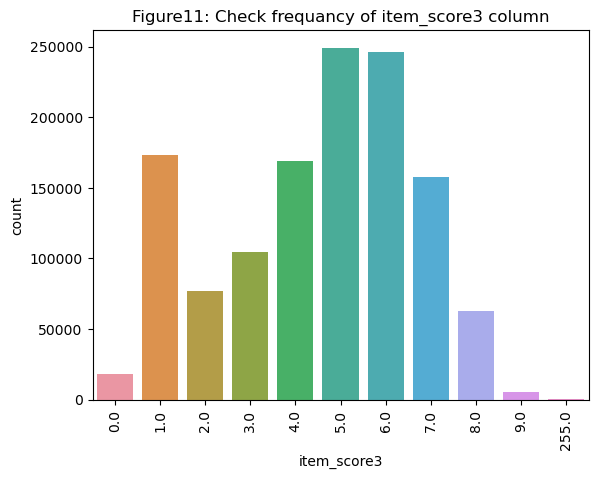

********************************************************************************
analysis for category_second column:
The number of values this column has: 
321
Most frequant value is: 
819433
This value appeared by: 4.614915924826904%
plot is not useful for this model
********************************************************************************
analysis for category_first column:
The number of values this column has: 
43
Most frequant value is: 
819433
This value appeared by: 11.764985163204749%


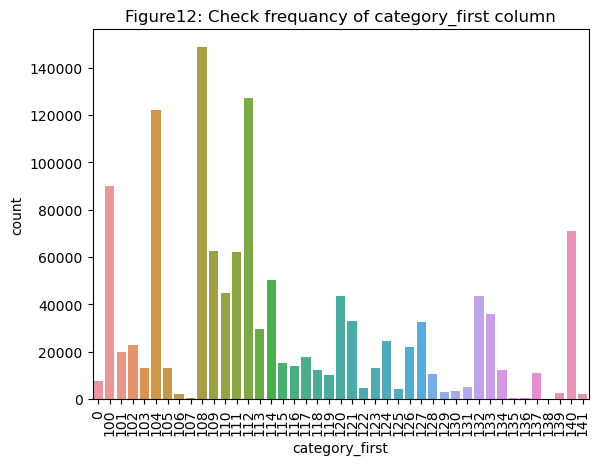

********************************************************************************
count of true or false values for read column: 
read
True     1217019
False      46731
Name: count, dtype: int64


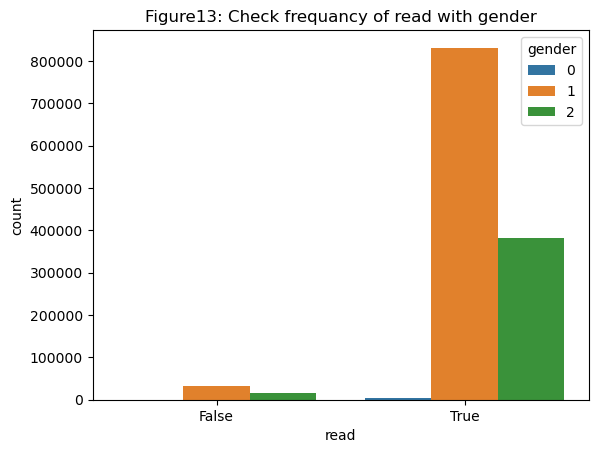

count of true or false values for share column: 
share
False    1249328
True       14422
Name: count, dtype: int64


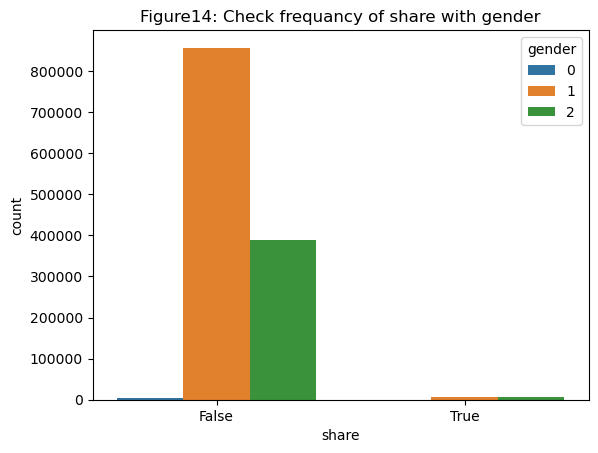

count of true or false values for like column: 
like
False    1246549
True       17201
Name: count, dtype: int64


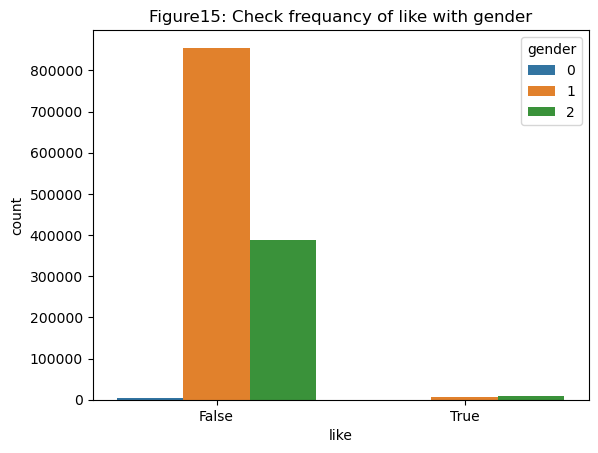

count of true or false values for follow column: 
follow
False    1262592
True        1158
Name: count, dtype: int64


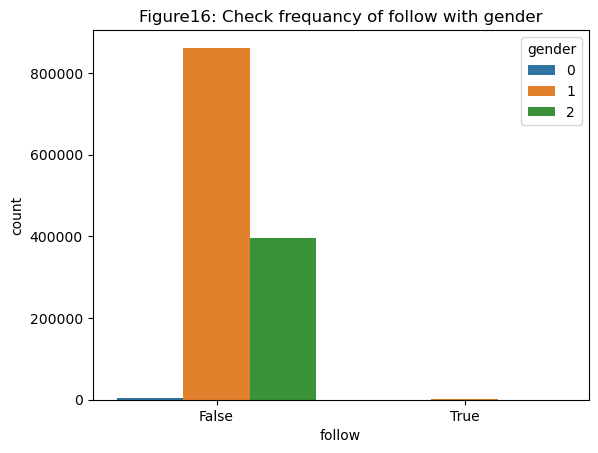

count of true or false values for favorite column: 
favorite
False    1256519
True        7231
Name: count, dtype: int64


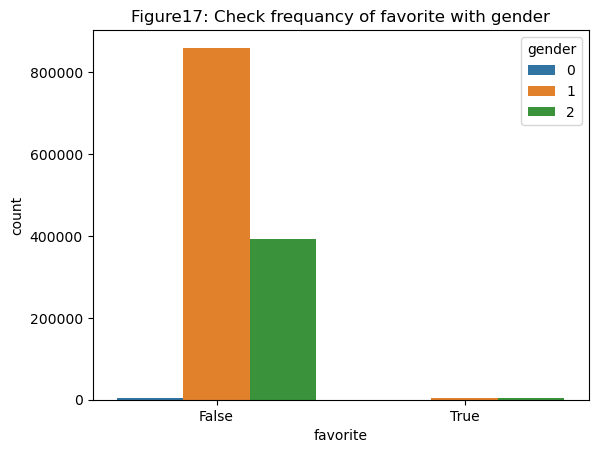

How many time this item was shared, liked and favorite: 
         share  follow  like  favorite
item_id                               
148          0       0     1         0
349          0       0     0         0
353          0       0     0         0
438          1       0     0         0
454          0       0     0         0
...        ...     ...   ...       ...
227269       0       0     0         0
227283       0       0     0         0
227303       0       0     0         0
227343       0       0     0         0
227348       0       0     0         0

[95933 rows x 4 columns]
How many time this user  shared, follow, liked and favorite items: 
         share  follow  like  favorite
user_id                               
11           0       0     0         0
24           0       0     0         0
33           2       0     0         0
44           0       0     0         0
71           0       0     0         0
...        ...     ...   ...       ...
1000005      0       0     0  

In [3]:
analysis("cold_data_0.7.csv")

- Data's shape is 1263750 samples and 20 features.
- Data has no null values but has 49128 duplicates.
- Data's categorical features:
    "user_id", "item_id", "gender", "age","item_score1", "item_score2", "item_score3", "category_second","category_first".
- Data's bool features: "share", "follow", "like", "favorite" and they treated as categorical features.
- Data's numerical features: "click_count", "like_count", "comment_count", "read_percentage", "read_time".
- By comparing mean and median values from decription of numerical values we found that all values have outliers. 
- Notice that we can not remove outliers as data is masked.
- By using hypothesis test and visualization all numeric features is not normal distribution.
- There was not any high correlation between two numerical features.
- For every categorical feature we can get their values and frequant of them by value count and get most frequant(mode) value in column.
- The last two group by to get How many time this item was shared, liked, favorite and read and for user to get how many time this user shared, liked, favorite and read any item. 
    